In [1]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [40]:
#importing the dataset
data = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

C:\Users\libin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [41]:
for i in data.columns:
    print(i,end =" ,")

eventid ,iyear ,imonth ,iday ,approxdate ,extended ,resolution ,country ,country_txt ,region ,region_txt ,provstate ,city ,latitude ,longitude ,specificity ,vicinity ,location ,summary ,crit1 ,crit2 ,crit3 ,doubtterr ,alternative ,alternative_txt ,multiple ,success ,suicide ,attacktype1 ,attacktype1_txt ,attacktype2 ,attacktype2_txt ,attacktype3 ,attacktype3_txt ,targtype1 ,targtype1_txt ,targsubtype1 ,targsubtype1_txt ,corp1 ,target1 ,natlty1 ,natlty1_txt ,targtype2 ,targtype2_txt ,targsubtype2 ,targsubtype2_txt ,corp2 ,target2 ,natlty2 ,natlty2_txt ,targtype3 ,targtype3_txt ,targsubtype3 ,targsubtype3_txt ,corp3 ,target3 ,natlty3 ,natlty3_txt ,gname ,gsubname ,gname2 ,gsubname2 ,gname3 ,gsubname3 ,motive ,guncertain1 ,guncertain2 ,guncertain3 ,individual ,nperps ,nperpcap ,claimed ,claimmode ,claimmode_txt ,claim2 ,claimmode2 ,claimmode2_txt ,claim3 ,claimmode3 ,claimmode3_txt ,compclaim ,weaptype1 ,weaptype1_txt ,weapsubtype1 ,weapsubtype1_txt ,weaptype2 ,weaptype2_txt ,weapsubtype2

In [42]:
data.shape

(181691, 135)

In [43]:
cols = []
for i in data.columns:
    if data[i].isnull().sum()>150000:
        cols.append(i)

In [44]:
data_new = data.drop(cols,axis=1)

In [45]:
data_new.shape

(181691, 67)

In [46]:

data_new.fillna(0,inplace=True)

In [47]:
data_new.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1',
       'crit2', 'crit3', 'doubtterr', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1',
       'natlty1_txt', 'gname', 'motive', 'guncertain1', 'individual', 'nperps',
       'nperpcap', 'claimed', 'weaptype1', 'weaptype1_txt', 'weapsubtype1',
       'weapsubtype1_txt', 'weapdetail', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'ransom',
       'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

In [48]:
countries_with_most_terrorism = data_new.country_txt.value_counts().head(10)
countries = list(countries_with_most_terrorism.index)


Text(0.5,1,'Countries with most terrorism')

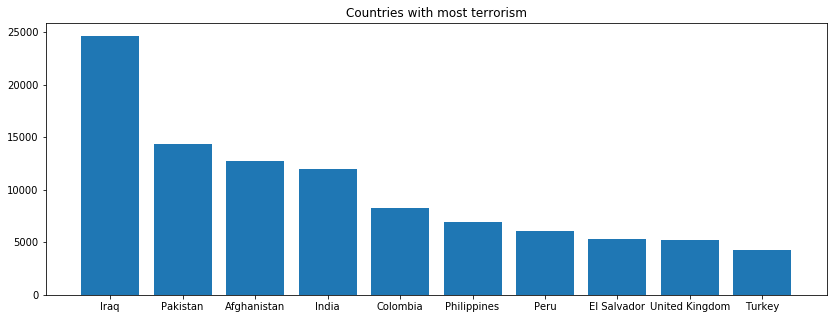

In [49]:

fig, ax = plt.subplots(figsize=(14,5))
ax.bar(countries_with_most_terrorism.index,countries_with_most_terrorism.values)
plt.title('Countries with most terrorism')

In [23]:
countries

['Iraq',
 'Pakistan',
 'Afghanistan',
 'India',
 'Colombia',
 'Philippines',
 'Peru',
 'El Salvador',
 'United Kingdom',
 'Turkey']

From the above graph it is clear that Iraq is the country with most terrorism.

In [50]:
data1 = data_new[data_new['country_txt'].isin(countries)]

In [52]:
data1.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'extended', 'country',
       'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1',
       'crit2', 'crit3', 'doubtterr', 'multiple', 'success', 'suicide',
       'attacktype1', 'attacktype1_txt', 'targtype1', 'targtype1_txt',
       'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1',
       'natlty1_txt', 'gname', 'motive', 'guncertain1', 'individual', 'nperps',
       'nperpcap', 'claimed', 'weaptype1', 'weaptype1_txt', 'weapsubtype1',
       'weapsubtype1_txt', 'weapdetail', 'nkill', 'nkillus', 'nkillter',
       'nwound', 'nwoundus', 'nwoundte', 'property', 'propextent',
       'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'ransom',
       'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO',
       'INT_MISC', 'INT_ANY'],
      dtype='object')

In [53]:
data1.head()

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,ishostkid,ransom,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,0.0,0.0,0,0,0,PGIS,-9,-9,1,1
26,197001210001,1970,1,21,0,160,Philippines,5,Southeast Asia,Metropolitan Manila,...,0.0,0.0,0,0,0,PGIS,-9,-9,1,1
39,197001310001,1970,1,31,0,160,Philippines,5,Southeast Asia,Tarlac,...,0.0,0.0,0,0,0,PGIS,0,1,1,1
96,197003000001,1970,3,0,0,160,Philippines,5,Southeast Asia,Metropolitian Manila,...,0.0,0.0,0,0,0,PGIS,-9,-9,1,1
150,197003240001,1970,3,24,0,160,Philippines,5,Southeast Asia,Pampanga,...,0.0,0.0,0,0,0,PGIS,-9,-9,1,1


In [54]:
data1.iyear.value_counts().head(10)

2014    9805
2016    8257
2015    8209
2013    8193
2017    6685
2012    5784
2011    3729
2010    3515
2009    3387
2008    3103
Name: iyear, dtype: int64

Text(0.5,1,'Years with most number of terrorist activity')

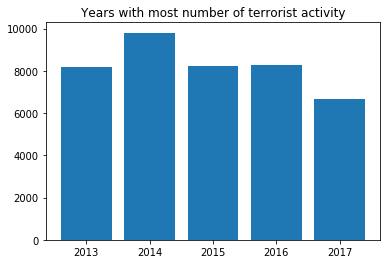

In [55]:
year = data1.iyear.value_counts().head(5)
plt.bar(year.index,year.values)
plt.title("Years with most number of terrorist activity")


2014 was recorded to have most number of terrorist attacks.

Text(0.5,1,'Type of Targets')

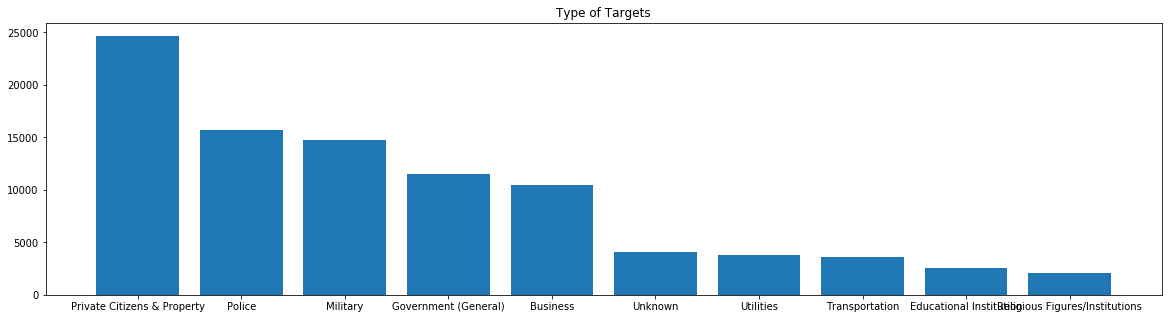

In [56]:
target = data1['targtype1_txt'].value_counts().head(10)
fig,ax = plt.subplots(figsize=(20,5))
ax.bar(target.index,target.values)
plt.title('Type of Targets')

In [ ]:
Private Citizens and property were targeted the most.

Text(0.5,1,'Type of attacks')

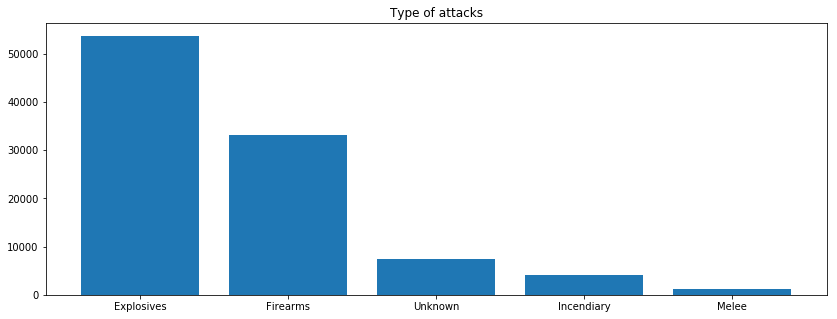

In [57]:
weapon_type = data1['weaptype1_txt'].value_counts().head(5)
fig,ax = plt.subplots(figsize=(14,5))
ax.bar(weapon_type.index,weapon_type.values)
plt.title('Type of attacks')

Explosives were used most number of times.

In [58]:
data_new.attacktype1_txt.value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

Text(0.5,1,'Type of attacks')

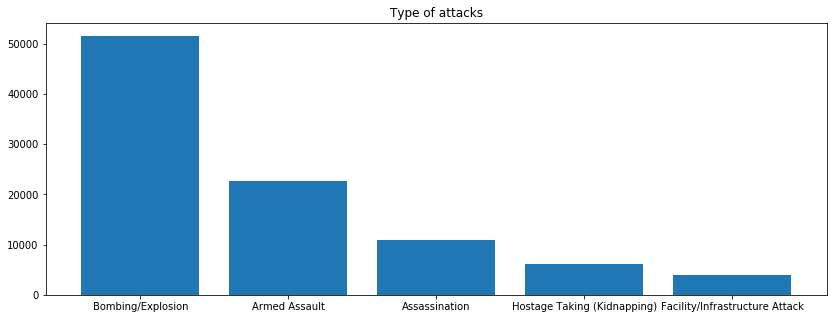

In [59]:
attack_type = data1['attacktype1_txt'].value_counts().head(5)
fig,ax = plt.subplots(figsize=(14,5))
ax.bar(attack_type.index,attack_type.values)
plt.title('Type of attacks')

From the above few graphs, we can see that most terrorist activities in 10 countries with most terrorist activities, the damage is majorly focused on civilians and usage of explosives to target masses is very high. This can be due to political problems within the country.

In [60]:
data2 = data1[data1['iyear'].isin(list(data1['iyear'].value_counts().head(5).index))]

Text(0.5,1,'Type of attacks')

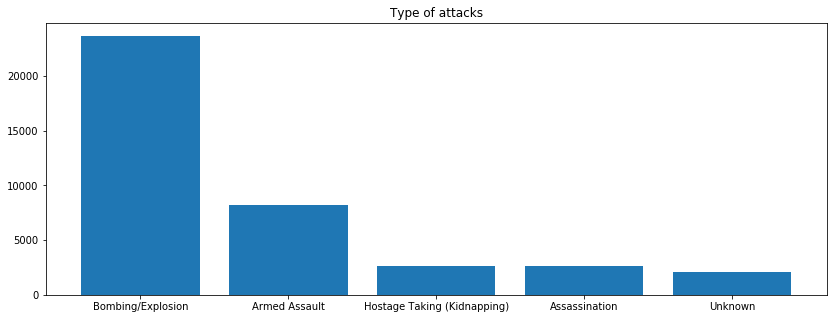

In [61]:
attack_type = data2['attacktype1_txt'].value_counts().head(5)
fig,ax = plt.subplots(figsize=(14,5))
ax.bar(attack_type.index,attack_type.values)
plt.title('Type of attacks')

Text(0.5,1,'Type of Targets')

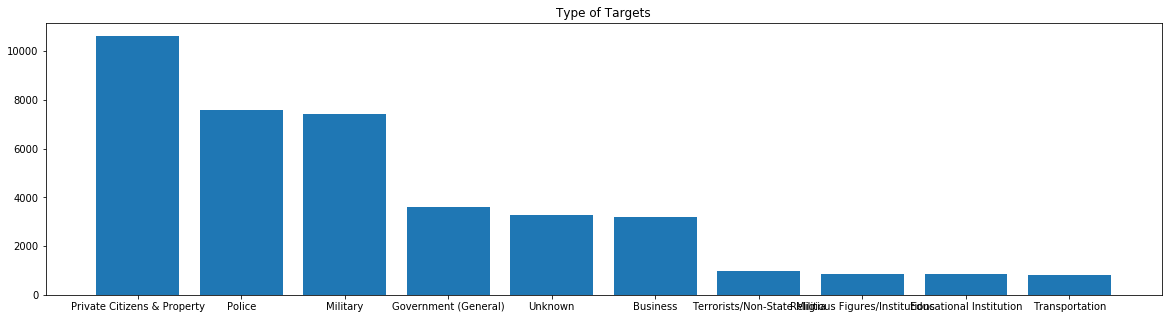

In [62]:
target = data2['targtype1_txt'].value_counts().head(10)
fig,ax = plt.subplots(figsize=(20,5))
ax.bar(target.index,target.values)
plt.title('Type of Targets')

Attacks on government officials have drastically increased.We can conclude that there might be some political issue either due to government not meeting to peoples demands or inter-country disputes.

In [63]:
cities_with_most_terrorism = data_new.city.value_counts().head(10)
cities = list(cities_with_most_terrorism.index)
cities_with_most_terrorism

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Name: city, dtype: int64

Text(0.5,1,'Countries with most terrorism')

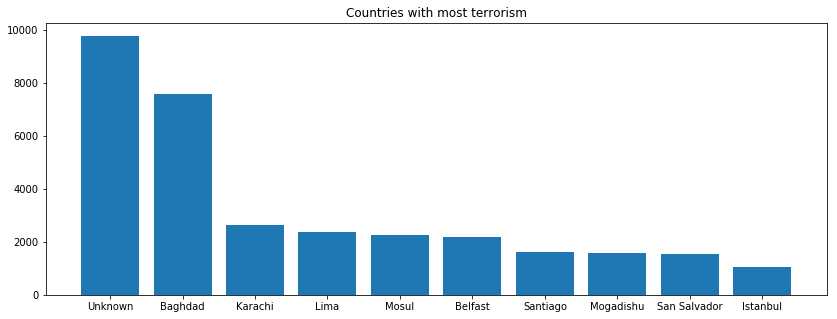

In [64]:
fig, ax = plt.subplots(figsize=(14,5))
ax.bar(cities_with_most_terrorism.index,cities_with_most_terrorism.values)
plt.title('Countries with most terrorism')

In [65]:
religious_target = data_new[data_new['targtype1_txt']=='Religious Figures/Institutions']

Text(0.5,1,'Countries with most terrorism on religious figures')

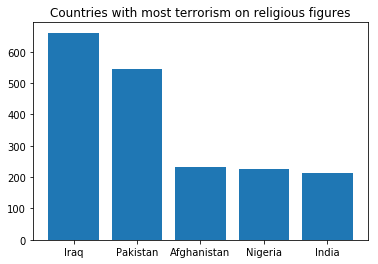

In [66]:
plt.bar(religious_target['country_txt'].value_counts().head().index,religious_target['country_txt'].value_counts().head().values)
plt.title("Countries with most terrorism on religious figures")

Iraq is the country with most terrorism due to religious reasons.